In [1]:
#Information about the data base we will be using
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_iris
from sklearn.preprocessing import QuantileTransformer
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Fetch the California housing dataset
housing = fetch_california_housing(as_frame=True)

# Access the DataFrame stored within the housing object
housing_data = housing['frame']

#Visualize the data
print(housing.DESCR)                                
housing.frame.head()

#we will choose two variables to try and predict the median value of owner-occupied homes in a given area (MedHouseVal, which will be the target). 
#We want to see which variables have the higher correlation with the target and we will use them as inputs for our model
corr = housing_data.corr()
correlation_with_target = corr['MedHouseVal'].sort_values(ascending=True)
print(correlation_with_target)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

As observed, the higher correlations are with the average number of rooms and the median income. We will use these as predictors.

REPRESENTATION OF DATA

20640 20640 20640


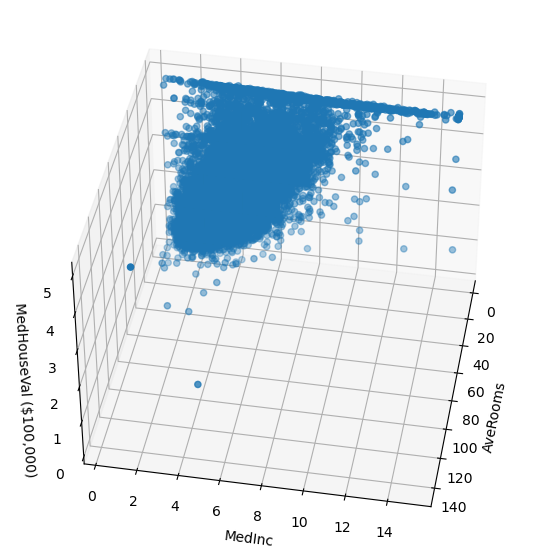

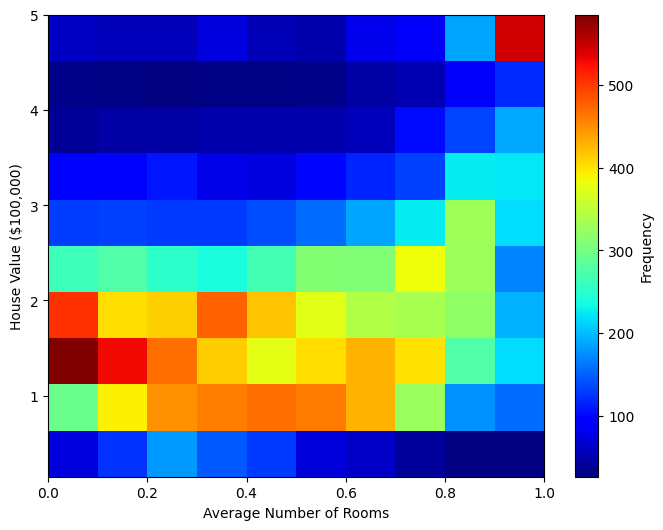

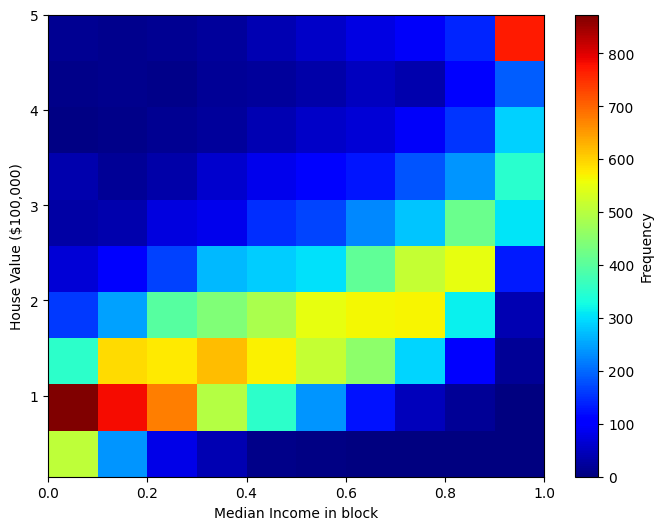

Maximum income:  15.0001
Maximum no. of rooms:  141.9090909090909
Maximum house age:  52.0


In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
from sklearn.preprocessing import QuantileTransformer

# Extract the data from our data set
rooms = housing_data['AveRooms']
income = housing_data['MedInc']
age= housing_data['HouseAge']
house_value = housing_data['MedHouseVal']
latitude = housing_data['AveBedrms']
population = housing_data['Population']
AveOccupa = housing_data['AveOccup']
Lat = housing_data['Latitude']
Long = housing_data['Longitude']


# Storing the extracted data into vectors x, y, and z
x = rooms.values  # Convert to numpy array using .values
y = income.values
u = age.values
z = house_value.values
print(len(x), len(y), len(z))


fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

# Plot the data as a scatter plot in 3D
ax.scatter(x, y, z)

# Add labels to the axes
ax.set_xlabel('AveRooms')
ax.set_ylabel('MedInc')
ax.set_zlabel('MedHouseVal ($100,000)', rotation=60)
ax.view_init(elev=40, azim=10)
plt.show()


# Stack predictors x and y horizontally
predictors = np.column_stack((x, y))

# Initialize the QuantileTransformer
quantile_transformer = QuantileTransformer()

# Fit the transformer to the data
quantile_transformer.fit(predictors)

# Transform the data using the fitted transformer
X_transformed = quantile_transformer.transform(predictors)

# Now X_scaled contains your scaled predictors x and y

x_scaled =X_transformed[:,0] 
y_scaled = X_transformed[:,1] 

# Create a histogram of house values with AveRooms on the x-axis
plt.figure(figsize=(8, 6))
plt.hist2d(x_scaled, z, cmap='jet')
plt.colorbar(label='Frequency')
plt.xlabel('Average Number of Rooms')
plt.ylabel('House Value ($100,000)')
#plt.xlim(1,30)
plt.show() 

# Create a histogram of house values with Income on the x-axis
plt.figure(figsize=(8, 6))
plt.hist2d(y_scaled, z, cmap='jet')
plt.colorbar(label='Frequency')
plt.xlabel('Median Income in block')
plt.ylabel('House Value ($100,000)')

#plt.xlim(1,30)


plt.show()

print("Maximum income: ", np.max(y))
print("Maximum no. of rooms: ", np.max(x))
print("Maximum house age: ", np.max(u))

Training R2
0.5473877347586042
Training MSE
0.604428213038648
Test R2
0.5437298280897098
Test MSE
0.6001135276300532


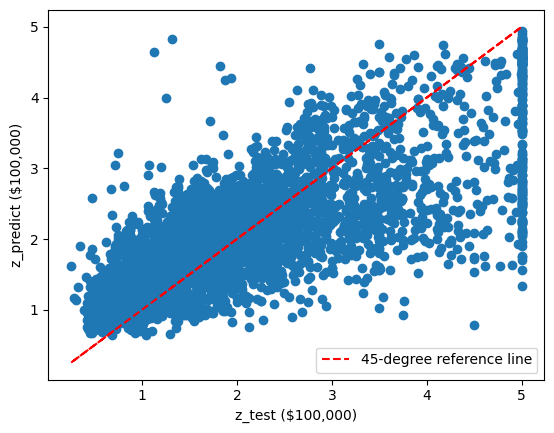

Beta  0 =  1.6024271709603677  Confidence Interval for beta_0: [1.4940862207932608, 1.7107681211274746]
Beta  1 =  -8.326228284591759  Confidence Interval for beta_1: [-9.874470612972887, -6.77798595621063]
Beta  2 =  5.320933899437199  Confidence Interval for beta_2: [3.764141158723456, 6.877726640150941]
Beta  3 =  22.100002903281997  Confidence Interval for beta_3: [12.807693453306161, 31.392312353257832]
Beta  4 =  11.298368742666325  Confidence Interval for beta_4: [4.364531743524351, 18.2322057418083]
Beta  5 =  -24.066827640051844  Confidence Interval for beta_5: [-33.235587463958765, -14.898067816144923]
Beta  6 =  -16.143882979664404  Confidence Interval for beta_6: [-40.709131612914895, 8.421365653586086]
Beta  7 =  -74.97835077284617  Confidence Interval for beta_7: [-93.40748482267868, -56.54921672301366]
Beta  8 =  29.349879199738076  Confidence Interval for beta_8: [10.395920412570675, 48.30383798690548]
Beta  9 =  68.77286929183411  Confidence Interval for beta_9: [44.17

In [3]:
#code for simple OLS

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import t

np.random.seed(41)

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n


#after robust scaling normalization is not usually necessary

n = len(x)
degree = 5

# Create a PolynomialFeatures object
poly = PolynomialFeatures(degree=degree)

# Transform the input features to include polynomial terms
x_y_array = np.column_stack((x_scaled, y_scaled)) 
x_y_array_poly = poly.fit_transform(x_y_array)


#design matrix: just a reshape of the x_y_array_poly
design_mat_X = np.reshape(x_y_array_poly, (n,-1))

# We split the data in test and training data
X_train, X_test, z_train, z_test = train_test_split(design_mat_X, z, test_size=0.2) 

beta = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(z_train)

# Calculate R2 and MSE on training set
ztilde_train = X_train @ beta
print("Training R2")
print(R2(z_train, ztilde_train))
print("Training MSE")
print(MSE(z_train, ztilde_train))

# Calculate R2 and MSE on test set
ztilde_test = X_test @ beta
print("Test R2")
print(R2(z_test, ztilde_test))
print("Test MSE")
print(MSE(z_test, ztilde_test))

# Visualize the data
plt.scatter(z_test, ztilde_test)
plt.plot(z_test, z_test, color='red', linestyle='--', label='45-degree reference line')
plt.xlabel('z_test ($100,000)')
plt.ylabel('z_predict ($100,000)')
plt.legend()
plt.show()

# Confidence Intervals
alpha = 0.05  # Set the confidence level to 95%
t_critical = stats.t.ppf(1 - alpha / 2, df=n - X_train.shape[1]) 

# Standard errors of the estimators
se_beta = np.sqrt(np.diag(MSE(z_test, ztilde_test) * np.linalg.inv(X_train.T @ X_train)))

# Calculate margin of error
margin_of_error = t_critical * se_beta

# Calculate confidence intervals for each coefficient
ci_lower = beta - margin_of_error
ci_upper = beta + margin_of_error

# Display results
for i, (lower, upper) in enumerate(zip(ci_lower, ci_upper)):
    print("Beta ",i, "= ", beta[i], f" Confidence Interval for beta_{i}: [{lower}, {upper}]")


0.543664486584474


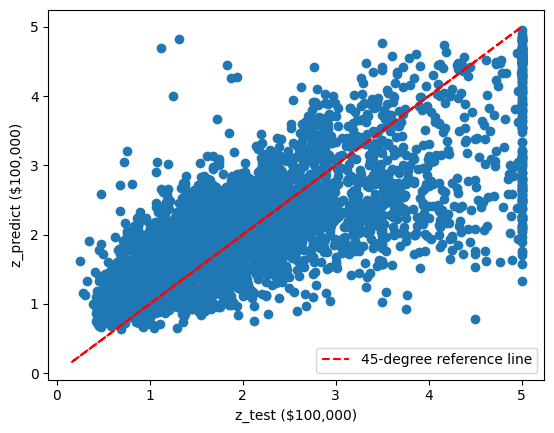

Error: 0.6011674408261181
Bias^2: 0.6001994686440002
Var: 0.0009679721821178051
0.6011674408261181 >= 0.6001994686440002 + 0.0009679721821178051 = 0.6011674408261181


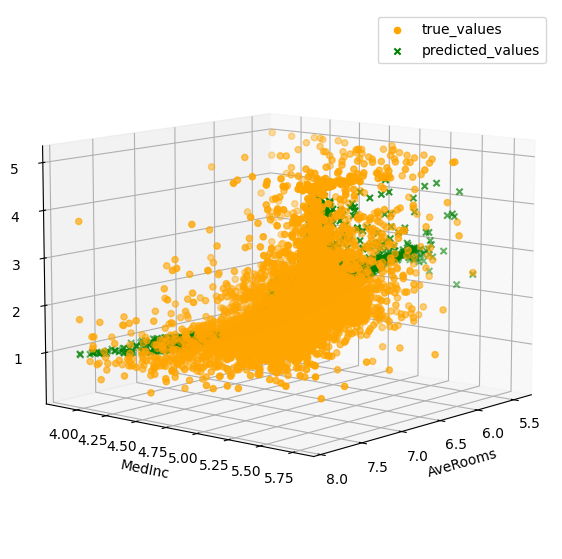

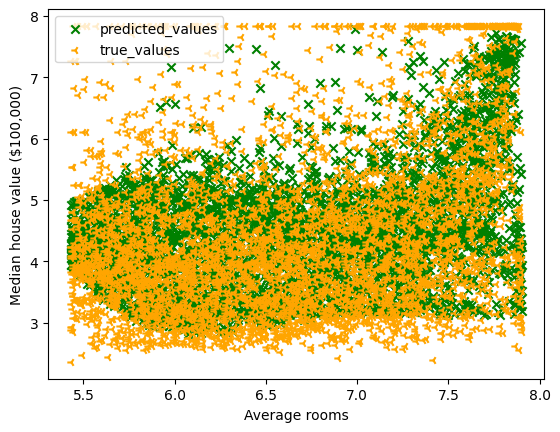

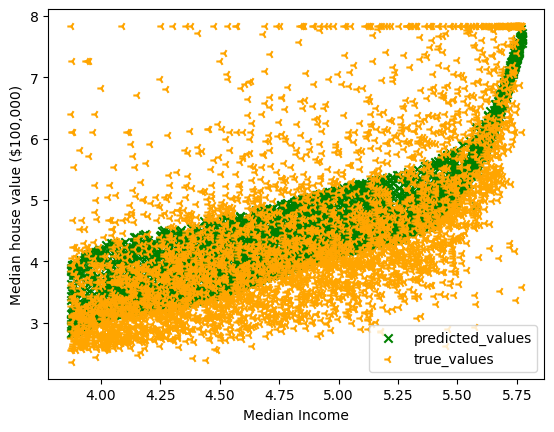

In [4]:
#Let's modified the above code to introduce bootstrap resampling technique

from sklearn.utils import resample
import math

np.random.seed(41)

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n


#split the array
x_y_array_train, x_y_array_test, z_train, z_test = train_test_split(x_y_array, z, test_size = 0.2)

x_y_array_poly = poly.fit_transform(x_y_array_train)
x_y_array_poly2 = poly.fit_transform(x_y_array_test)

#design matrix: just a reshape of the x_y_array_poly
X_train = np.reshape(x_y_array_poly, (len(x_y_array_train),-1))
X_test = np.reshape(x_y_array_poly2, (len(x_y_array_test),-1))

#bootstrap variables
n_bootstrap = 100
bootstrap_coefs = []
bootstrap_mse = []
zpredict_boot = np.zeros((len(z_test), n_bootstrap))

for m in range(n_bootstrap):

    X_boot, z_boot = resample(X_train, z_train, replace = True)

    # Calculation of optimal parameters
    beta = np.linalg.inv(X_boot.T.dot(X_boot)).dot(X_boot.T).dot(z_boot)
    zpredict_boot[:,m] = X_test @ beta


plt.scatter(z_test, np.mean(zpredict_boot, axis=1) )
print(R2(z_test,  np.mean(zpredict_boot, axis=1)))

plt.plot(z, z, color='red', linestyle='--', label='45-degree reference line')
plt.xlabel('z_test ($100,000)')
plt.ylabel('z_predict ($100,000)')
plt.legend()
plt.show()

#calculation of error, bias and variance
z_test = np.reshape(z_test,(len(z_test),1))
error = np.mean( np.mean((z_test - zpredict_boot)**2, axis=1, keepdims=True) )
bias = np.mean( (z_test - np.mean(zpredict_boot, axis=1, keepdims=True))**2 )
variance = np.mean( np.var(zpredict_boot, axis=1, keepdims=True) )
print('Error:', error)
print('Bias^2:', bias)
print('Var:', variance)
print('{} >= {} + {} = {}'.format(error, bias, variance, bias+variance))

#---------------------------
#   INTERESTING PLOTS
#---------------------------

# Unzip the list of tuples
unzipped = np.array(list(zip(*(x_y_array_test))))

# Resulting lists
first_elements, second_elements = unzipped 
first_elements = np.array(first_elements) #x
second_elements=np.array(second_elements) #y

# Create a 3D surface plot
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection = '3d')

#return everything to the initial scale for the plot
f = first_elements*np.std(x)+np.mean(x)
s = second_elements*np.std(y)+np.mean(y)

ax.scatter(f, s, z_test, c='orange', marker='o', label = "true_values")
ax.scatter(f, s, np.mean(zpredict_boot, axis=1), c='g', marker='x', label = "predicted_values")
ax.set_xlabel('AveRooms')
ax.set_ylabel('MedInc')
ax.set_zlabel('MedHouseVal ($100,000)', rotation=60)
plt.legend()
ax.view_init(elev=10, azim=40)


plt.show()

plt.scatter(f,np.mean(zpredict_boot, axis=1)*np.std(z)+np.mean(z), c='g', marker='x', label = "predicted_values")
plt.scatter(f,z_test*np.std(z)+np.mean(z), c='orange', marker='3', label = "true_values")
plt.xlabel("Average rooms")
plt.ylabel("Median house value ($100,000)")
plt.legend()
plt.show()

plt.scatter(s,np.mean(zpredict_boot, axis=1)*np.std(z)+np.mean(z), c='g', marker='x', label = "predicted_values")
plt.scatter(s,z_test*np.std(z)+np.mean(z), c='orange', marker='3', label = "true_values")
plt.xlabel("Median Income")
plt.ylabel("Median house value ($100,000)")
plt.legend()
plt.show()

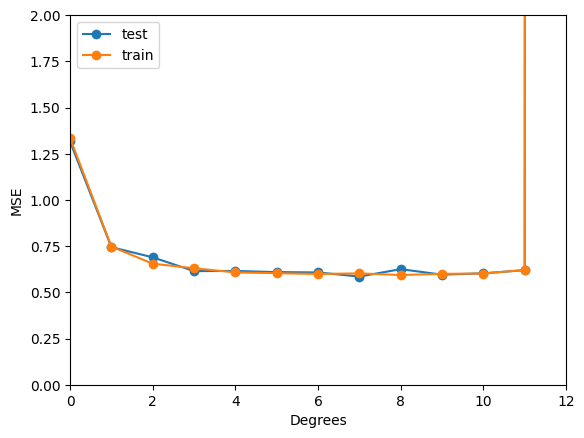

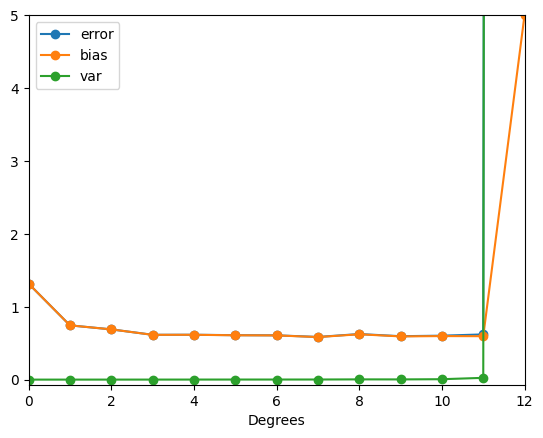

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

np.random.seed(41)

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n



#lists for MSE and degree
degrees = np.arange(15)
MSE_list_train = []
MSE_list_test = []
Bias_list=[]
variance_list=[]


for degree in degrees:

    # Create a PolynomialFeatures object
    poly = PolynomialFeatures(degree=degree)

    # Transform the input features to include polynomial terms

    x_y_array_poly = poly.fit_transform(x_y_array)

    #design matrix: just a reshape of the x_y_array_poly
    design_mat_X = np.reshape(x_y_array_poly, (n,-1))

    # We split the data in test and training data
    X_train, X_test, z_train, z_test = train_test_split(design_mat_X, z, test_size=0.2) 

    #bootstrap variables
    n_bootstrap = 100
    bootstrap_coefs = []
    bootstrap_mse = []
    zpredict_boot = np.zeros((len(z_test), n_bootstrap))
    ztilde_boot = np.zeros((len(z_train), n_bootstrap))

    for m in range(n_bootstrap):

        X_boot, z_boot = resample(X_train, z_train, replace = True)

        # Calculation of optimal parameters
        beta = np.linalg.inv(X_boot.T.dot(X_boot)).dot(X_boot.T).dot(z_boot)
        zpredict_boot[:,m] = X_test @ beta
        ztilde_boot[:,m]  = X_train @ beta
    
    #reshaping for broadcasting
    z_test = np.reshape(z_test,(len(z_test),1))
    z_train = np.reshape(z_train,(len(z_train),1))
       
    MSE_list_test.append(np.mean( np.mean((z_test - zpredict_boot)**2, axis=1, keepdims=True) ))
    MSE_list_train.append(np.mean( np.mean((z_train - ztilde_boot)**2, axis=1, keepdims=True) ))
    Bias_list.append( np.mean( (z_test - np.mean(zpredict_boot, axis=1, keepdims=True))**2 ))
    variance_list.append( np.mean( np.var(zpredict_boot, axis=1, keepdims=True) ))
    
plt.plot(degrees, MSE_list_test, marker='o', linestyle='-', label="test")
plt.plot(degrees, MSE_list_train,marker='o', linestyle='-', label = "train")
plt.ylim(0,2)
plt.xlim(0,12)
plt.xlabel('Degrees')
plt.ylabel('MSE')
plt.legend()
plt.show()

plt.plot(degrees, MSE_list_test,marker='o', linestyle='-', label="error")
plt.plot(degrees, Bias_list,marker='o', linestyle='-', label = "bias")
plt.plot(degrees, variance_list, marker='o', linestyle='-',label = "var")
plt.xlabel('Degrees')
plt.ylim(-0.07,5)
plt.xlim(0,12)
plt.legend()
plt.show()

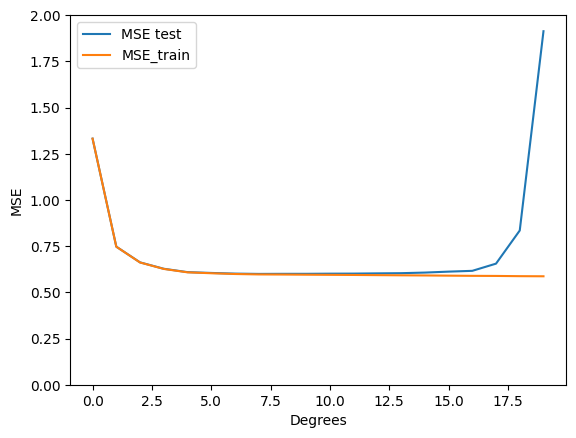

In [7]:
#CROSS-VAL

#now as we see that the mse doesn't change that much with k, we set K = 5
from sklearn.model_selection import cross_val_predict, KFold
#cross_val_predict already does the splitting of the data into training and test internally, so there is no need to do this explicitly on the code
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt

#lists for MSE and degree
k_fold = 5
degrees = np.arange(20)
MSE_list_train = []
MSE_list_test = []


z_predict_fold = np.zeros(n)

# Use k-fold cross-validation with the specified number of folds (k_fold)
kfold = KFold(n_splits=k_fold, shuffle=True, random_state=42)

for deg in degrees:

    poly = PolynomialFeatures(degree=deg)
    x_y_array_poly = poly.fit_transform(x_y_array)
    design_mat_X = np.reshape(x_y_array_poly, (n, -1))
    model = LinearRegression()

    mse_train = 0
    mse_test = 0

    #we want to know which data has been used for testing and which for training to calculate separate mse
    for train_ind, test_ind in kfold.split(design_mat_X): 
        X_train, X_test = design_mat_X[train_ind], design_mat_X[test_ind]
        z_train, z_test = z[train_ind], z[test_ind]

        #fit the model
        model.fit(X_train, z_train)

        ztilde = model.predict(X_train)
        zpredict = model.predict(X_test)

        mse_train = mse_train+ MSE(z_train, ztilde)
        mse_test = mse_test+MSE(z_test, zpredict)

    #now we need to average over all kfolds
    mse_train = mse_train/k_fold
    mse_test = mse_test / k_fold
    MSE_list_train.append(mse_train)
    MSE_list_test.append(mse_test)
    
plt.plot(degrees, MSE_list_test, label="MSE test")
plt.plot(degrees, MSE_list_train, label = "MSE_train")
plt.ylim(0,2)
plt.xlabel('Degrees')
plt.ylabel("MSE")
plt.legend()
plt.show()

#this has to be done for polynomials not for the kfold

# Part d

In [113]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error



# Reshape x and y to 2D arrays
x = x_scaled.reshape(-1, 1)
y = y_scaled.reshape(-1, 1)

# Step 2: Split data into training and testing sets
x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(x, y, z, test_size=0.2)

# Step 3: Define range of lambda values
lambda_values = [0.1, 1, 10, 100, 1000, 2500, 5000, 7500, 10000]
mse_list=[]
# Step 4: Implement Ridge Regression
for l in lambda_values:
    ridge_model = Ridge(alpha=l)

    # Step 5: Perform resampling techniques for each lambda value
    # Bootstrap analysis
    # Your code for bootstrap analysis here

    # Cross-validation
    # Your code for cross-validation here

    # Step 6: Evaluate model performance
    ridge_model.fit(x_train, z_train)  # Use x_train and z_train
    z_pred = ridge_model.predict(x_test)  # Use x_test for prediction
    mse = mean_squared_error(z_test, z_pred)
    mse_list.append(mse)
    print(f"Lambda: {l}, MSE: {mse}")

Lambda: 0.1, MSE: 1.2342399074895842
Lambda: 1, MSE: 1.2342398554982474
Lambda: 10, MSE: 1.2342446322329925
Lambda: 100, MSE: 1.2347524872616522
Lambda: 1000, MSE: 1.2543747485797891
Lambda: 2500, MSE: 1.2815569741040116
Lambda: 5000, MSE: 1.3041851299361962
Lambda: 7500, MSE: 1.3154459164017058
Lambda: 10000, MSE: 1.3221238151706016


Lambda: 0.1, MSE: 1.2342399074895842
Lambda: 1, MSE: 1.2342398554982474
Lambda: 10, MSE: 1.2342446322329925
Lambda: 100, MSE: 1.2347524872616522
Lambda: 1000, MSE: 1.2543747485797891
Lambda: 2500, MSE: 1.2815569741040116
Lambda: 5000, MSE: 1.3041851299361962
Lambda: 7500, MSE: 1.3154459164017058
Lambda: 10000, MSE: 1.3221238151706016


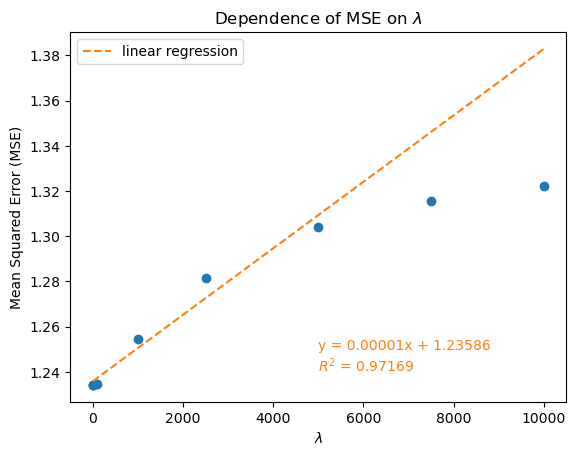

In [114]:
import matplotlib.pyplot as plt

# List to store MSE values for different lambda values
mse_values = []

# Step 4: Implement Ridge Regression
for l in lambda_values:
    ridge_model = Ridge(alpha=l)

    # Step 5: Perform resampling techniques for each lambda value
    # Bootstrap analysis
    # Your code for bootstrap analysis here

    # Cross-validation
    # Your code for cross-validation here

    # Step 6: Evaluate model performance
    ridge_model.fit(x_train, z_train)  # Use x_train and z_train
    z_pred = ridge_model.predict(x_test)  # Use x_test for prediction
    mse = mean_squared_error(z_test, z_pred)
    mse_values.append(mse)  # Store MSE value for this lambda

    # Print MSE for this lambda
    print(f"Lambda: {l}, MSE: {mse}")

# Study the dependence on lambda
L = [[0.1], [1], [10], [100], [1000], [2500], [5000]]
m=[]
for i in range(len(mse_values)-2):
    m.append(mse_values[i])
model = LinearRegression()
model.fit(L, np.array(m))
X_new = np.linspace(0, 10000, 1000).reshape(-1, 1)
prediction = model.predict(X_new)
    
# Get the coefficients (slope) and intercept of the linear regression line
slope = model.coef_[0]
intercept = model.intercept_

# Get the R^2 value
r_squared = model.score(L, np.array(m))


# Plot the dependence of MSE on lambda
plt.plot(lambda_values, mse_values, marker='o', linewidth=0)
plt.plot(X_new, prediction, '--', label = 'linear regression')
plt.legend()
plt.xlabel('$\lambda$')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Dependence of MSE on $\lambda$')

# Annotate the plot with the equation of the line and the R^2 value
equation_text = f'y = {slope:.5f}x + {intercept:.5f}'
r_squared_text = f'$R^2$ = {r_squared:.5f}'
plt.annotate(equation_text,(5000,1.25), color='tab:orange')
plt.annotate(r_squared_text,(5000,1.24), color='tab:orange')

plt.grid(False)
plt.savefig('dependende_lambda_ridge.pdf',bbox_inches='tight')
plt.show()

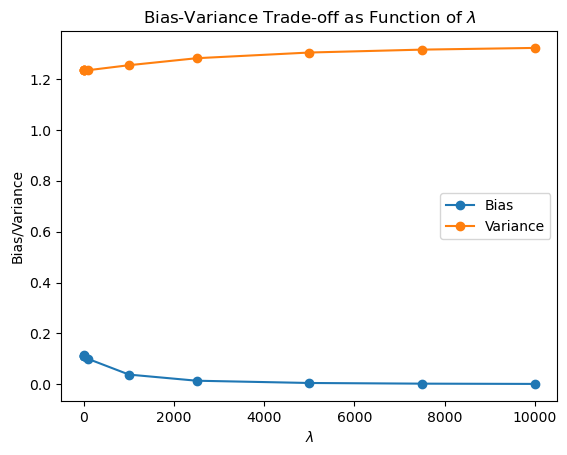

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Define a function to calculate bias and variance
def calculate_bias_variance(predictions, true_values):
    bias = np.mean((predictions - np.mean(predictions)) ** 2)
    variance = np.mean((predictions - true_values) ** 2)
    return bias, variance

# Step 3: Define range of lambda values
lambda_values = [0.01, 0.1, 1, 10, 100, 1000, 2500, 5000, 7500, 10000]

# Lists to store bias and variance values for each lambda
bias_values = []
variance_values = []

# Step 4: Implement Ridge Regression
for l in lambda_values:
    # List to store predictions for each bootstrap sample
    predictions = []
    
    for _ in range(100):  # Perform bootstrap resampling 100 times
        # Bootstrap resampling
        x_boot, z_boot = resample(x_train, z_train)
        
        # Fit Ridge Regression model
        ridge_model = Ridge(alpha=l)
        ridge_model.fit(x_boot, z_boot)
        
        # Predict on test set
        z_pred = ridge_model.predict(x_test)
        predictions.append(z_pred)

    # Calculate bias and variance for this lambda value
    bias, variance = calculate_bias_variance(np.mean(predictions, axis=0), z_test)
    bias_values.append(bias)
    variance_values.append(variance)

# Step 5: Plot bias and variance as functions of lambda
plt.plot(lambda_values, bias_values,'o-', label='Bias')
plt.plot(lambda_values, variance_values,'o-', label='Variance')
plt.xlabel('$\lambda$')
plt.ylabel('Bias/Variance')
plt.title('Bias-Variance Trade-off as Function of $\lambda$')
#plt.xscale('log')  # Use log scale for better visualization if lambda varies widely
plt.legend()
plt.grid(False)
plt.savefig('bias-variance_trade_off.pdf',bbox_inches='tight')
plt.show()

# Step 6: Analyze results and comment
# Your comments on bias-variance trade-off here
